## importing libraries

In [219]:
import pickle

In [220]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## importing data

In [221]:
df = pd.read_csv(r'/kaggle/input/car-sales-report/Car Sales.xlsx - car_data.csv')

In [222]:
df.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [223]:
df.drop(columns=['Car_id','Dealer_No ','Phone'],inplace=True)

In [224]:
df.head()

,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Body Style,Dealer_Region
0,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,SUV,Middletown
1,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,SUV,Aurora
2,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,Passenger,Greenville
3,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,SUV,Pasco
4,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,Hatchback,Janesville


In [225]:
df.shape

(23906, 13)

## cleaning data

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           23906 non-null  object
 1   Customer Name  23905 non-null  object
 2   Gender         23906 non-null  object
 3   Annual Income  23906 non-null  int64 
 4   Dealer_Name    23906 non-null  object
 5   Company        23906 non-null  object
 6   Model          23906 non-null  object
 7   Engine         23906 non-null  object
 8   Transmission   23906 non-null  object
 9   Color          23906 non-null  object
 10  Price ($)      23906 non-null  int64 
 11  Body Style     23906 non-null  object
 12  Dealer_Region  23906 non-null  object
dtypes: int64(2), object(11)
memory usage: 2.4+ MB


In [227]:
df.isna().sum()

Date             0
Customer Name    1
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Body Style       0
Dealer_Region    0
dtype: int64

In [228]:
df.dropna(inplace=True)

In [229]:
df.isna().sum()

Date             0
Customer Name    0
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Body Style       0
Dealer_Region    0
dtype: int64

In [230]:
df.duplicated().sum()

0

In [231]:
df.describe()

,Annual Income,Price ($)
count,2.390500e+04,23905.000000
mean,8.308466e+05,28089.540473
std,7.200208e+05,14788.592495
min,1.008000e+04,1200.000000
25%,3.860000e+05,18001.000000
50%,7.350000e+05,23000.000000
75%,1.176000e+06,34000.000000
max,1.120000e+07,85800.000000


In [232]:
df.nunique()

Date              612
Customer Name    3021
Gender              2
Annual Income    2508
Dealer_Name        28
Company            30
Model             154
Engine              2
Transmission        2
Color               3
Price ($)         870
Body Style          5
Dealer_Region       7
dtype: int64

### feature engineering

In [233]:
df['Date'] = pd.to_datetime(df['Date'])
print(df['Date'].dtype)
df['Date'].head()

datetime64[ns]


0   2022-01-02
1   2022-01-02
2   2022-01-02
3   2022-01-02
4   2022-01-02
Name: Date, dtype: datetime64[ns]

In [234]:
df.head(3)

,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Body Style,Dealer_Region
0,2022-01-02,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,SUV,Middletown
1,2022-01-02,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,SUV,Aurora
2,2022-01-02,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,Passenger,Greenville


In [235]:
df['month'] = df['Date'].dt.month_name()

df['month'].sample(5)


11088     January
10835     January
10289    December
20332    November
9112     December
Name: month, dtype: object

In [236]:
df['WeekDay'] = df['Date'].dt.day_name()
df['WeekDay'].sample(5)

5640     Wednesday
4863       Tuesday
18206      Tuesday
11463      Tuesday
7327        Monday
Name: WeekDay, dtype: object

In [237]:
df['day'] = df['Date'].dt.day
df['day'] = df['day'].apply(str)
df['day'].head()

0    2
1    2
2    2
3    2
4    2
Name: day, dtype: object

In [238]:
df.columns

Index(['Date', 'Customer Name', 'Gender', 'Annual Income', 'Dealer_Name',
       'Company', 'Model', 'Engine', 'Transmission', 'Color', 'Price ($)',
       'Body Style', 'Dealer_Region', 'month', 'WeekDay', 'day'],
      dtype='object')

## visualization

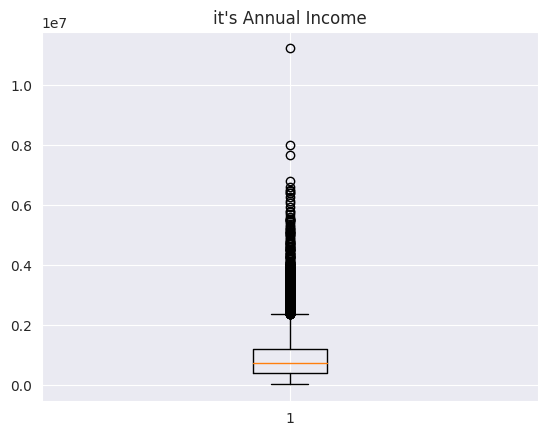

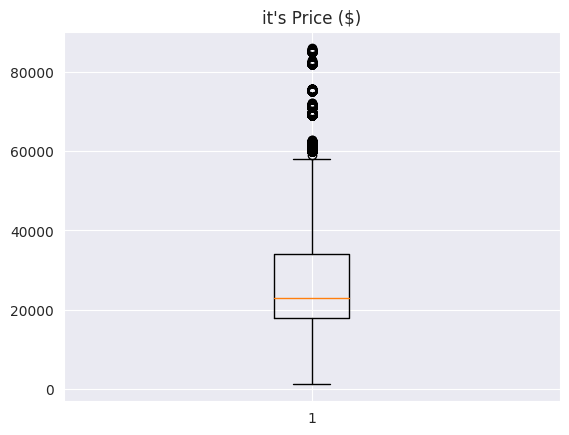

In [239]:
numric_cols = ['Annual Income','Price ($)']
sns.set_style('darkgrid')
for col in numric_cols: 
    fig,ax = plt.subplots()
    ax.boxplot(df[col])
    ax.set(title=f"it's {col}")
    plt.show()

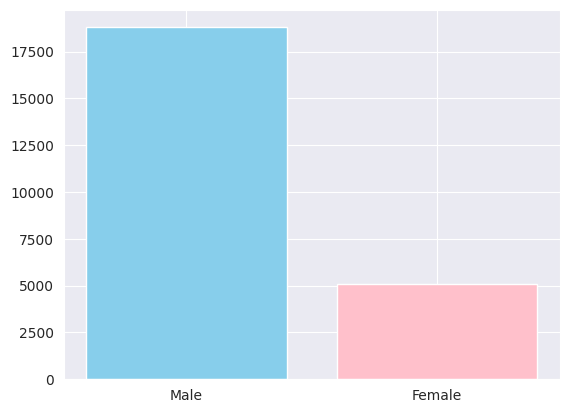

In [240]:
tmp = df['Gender'].value_counts()

fig,ax = plt.subplots()
ax.bar(tmp.index,tmp,color=['skyblue','pink'])
plt.show()

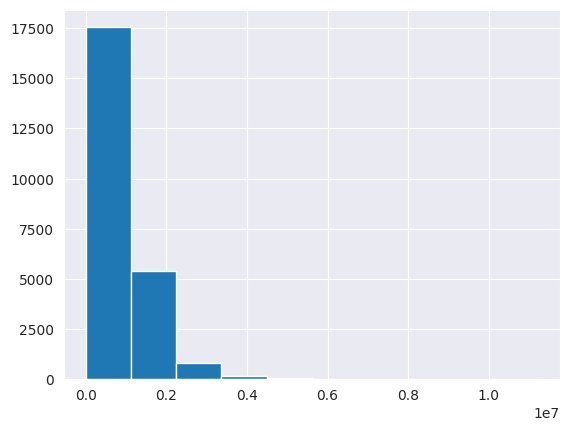

In [241]:
# the distripution of Annual Income
fig,ax = plt.subplots()
ax.hist(df['Annual Income'])
plt.show()

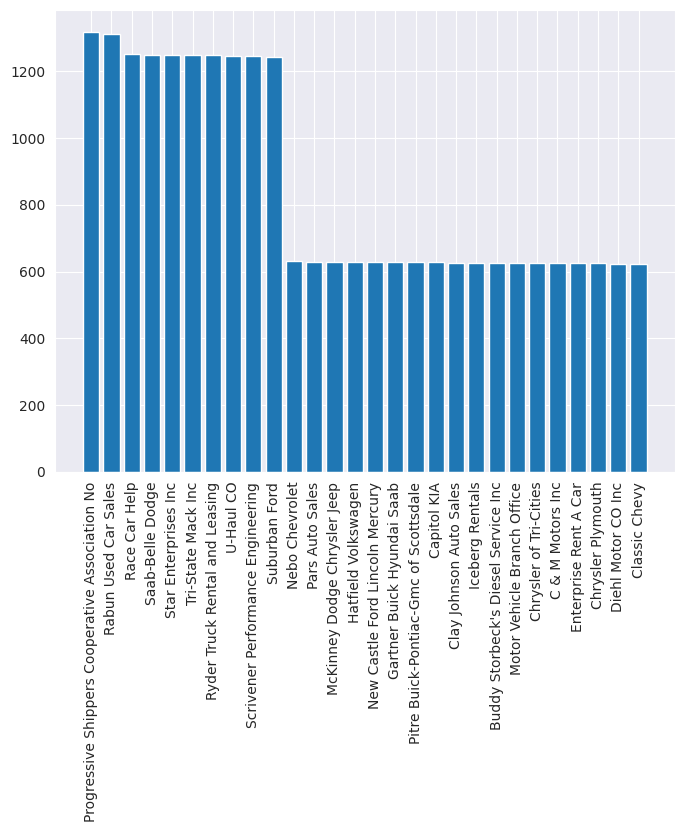

In [242]:
# the number of deals for each dealer
tmp = df['Dealer_Name'].value_counts().sort_values(ascending= False)

fig,ax = plt.subplots(figsize=(8,6))
ax.bar(tmp.index,tmp)
plt.xticks(rotation=90)
plt.show()


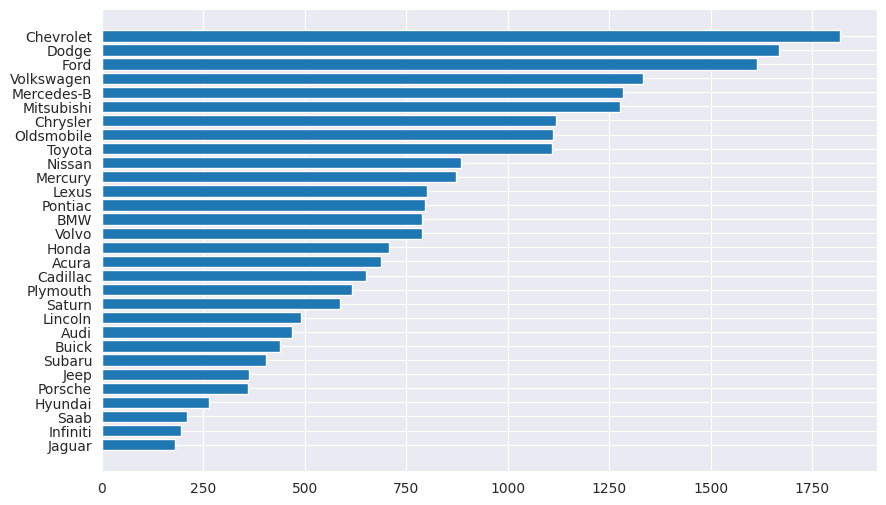

In [243]:
# the number of deals for each company
tmp = df['Company'].value_counts().sort_values()

fig,ax = plt.subplots(figsize=(10,6))
ax.barh(tmp.index,tmp)
plt.show()


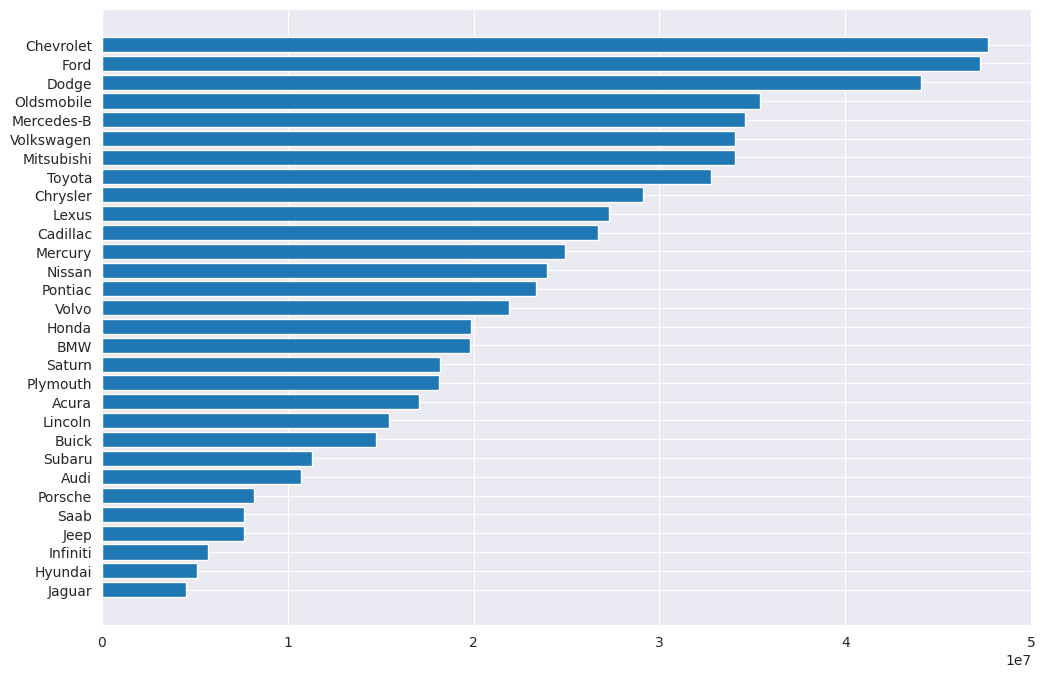

In [244]:
# the sum of price for each company
tmp = df[['Company','Price ($)']].groupby(['Company']).sum()
tmp = tmp.sort_values(by='Price ($)')
tmp.reset_index(inplace=True)

fig,ax = plt.subplots(figsize=(12,8))
ax.barh(tmp['Company'],tmp['Price ($)'])
plt.show()

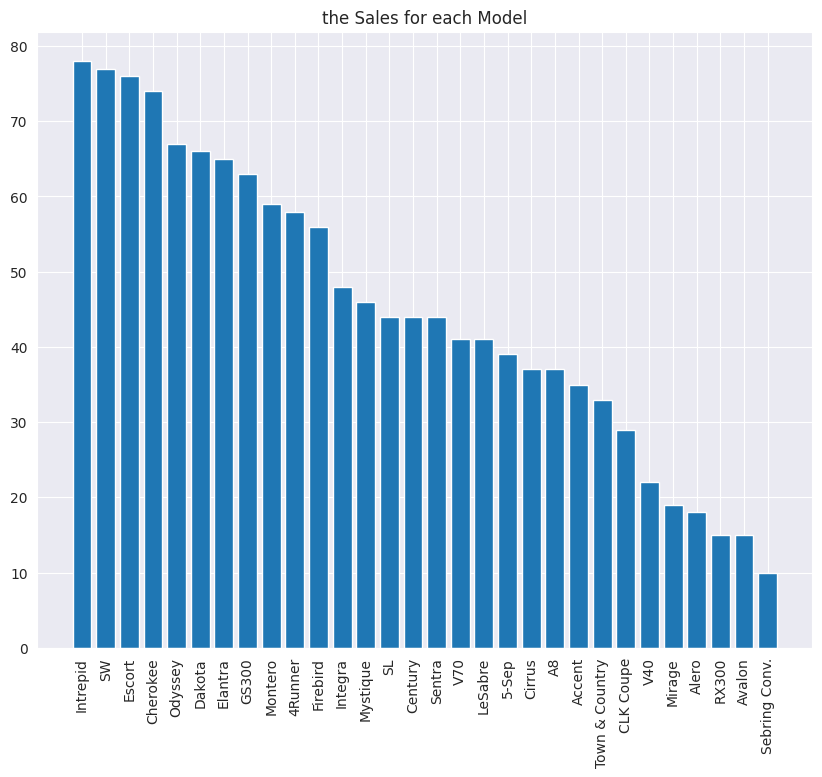

In [245]:
# the Sales for each model
tmp = df['Model'].value_counts().sort_values(ascending=False)[124:]

fig,ax = plt.subplots(figsize=(10,8))
ax.bar(tmp.index,tmp)
ax.set_title('the Sales for each Model')
plt.xticks(rotation=90)
plt.show()


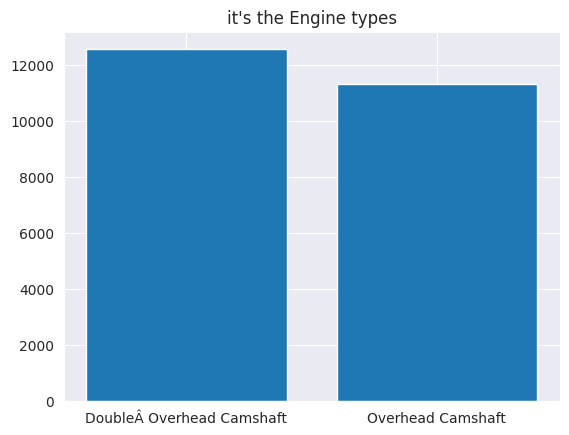

In [246]:
tmp = df['Engine'].value_counts()

fig,ax= plt.subplots()
ax.bar(tmp.index,tmp)
ax.set_title("it's the Engine types")
plt.show()

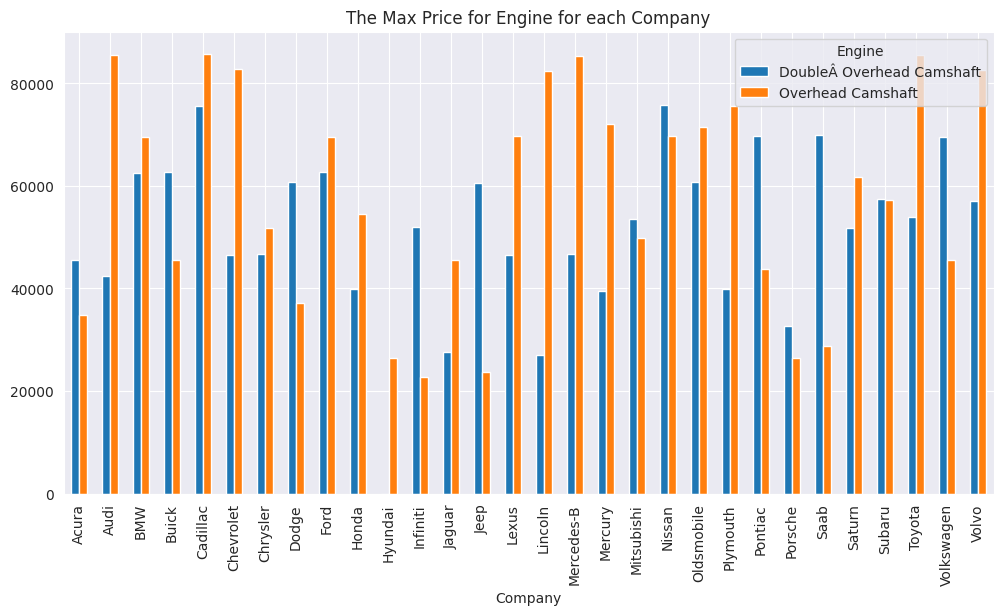

In [247]:
tmp = pd.crosstab(df['Company'],df['Engine'],values=df['Price ($)'],aggfunc='max')

tmp.plot(kind='bar',figsize=(12,6))
plt.title('The Max Price for Engine for each Company')
plt.show()


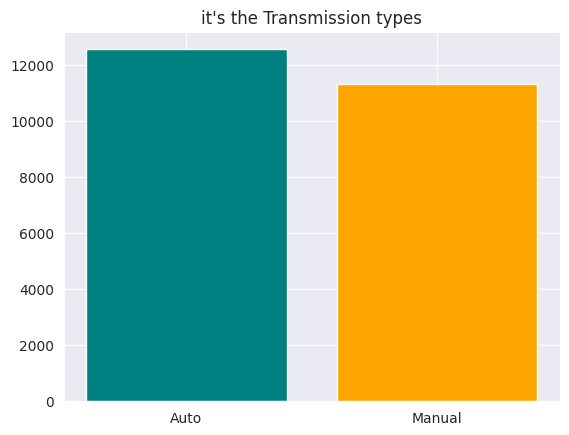

In [248]:
tmp = df['Transmission'].value_counts()

fig,ax= plt.subplots()
ax.bar(tmp.index,tmp,color=['teal','orange'])
ax.set_title("it's the Transmission types")
plt.show()

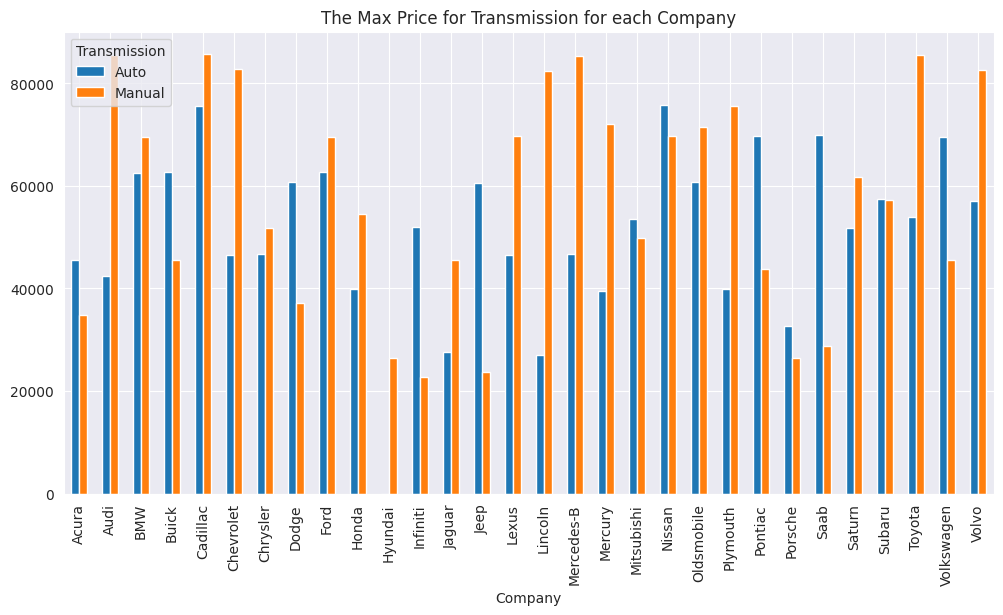

In [249]:
tmp = pd.crosstab(df['Company'],df['Transmission'],values=df['Price ($)'],aggfunc='max')


tmp.plot(kind='bar',figsize=(12,6))
plt.title('The Max Price for Transmission for each Company')
plt.show()

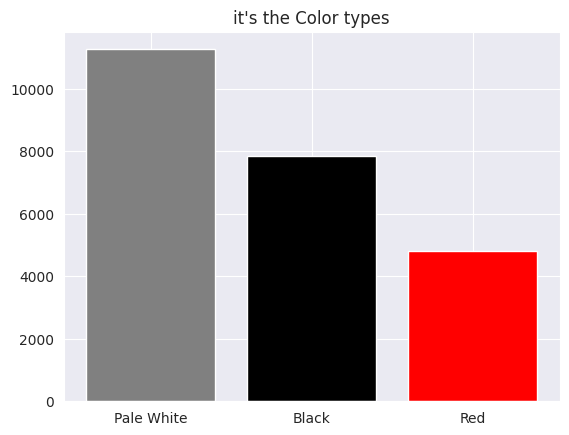

In [250]:
tmp = df['Color'].value_counts()

fig,ax= plt.subplots()
ax.bar(tmp.index,tmp,color=['grey','black','red'])
ax.set_title("it's the Color types")
plt.show()

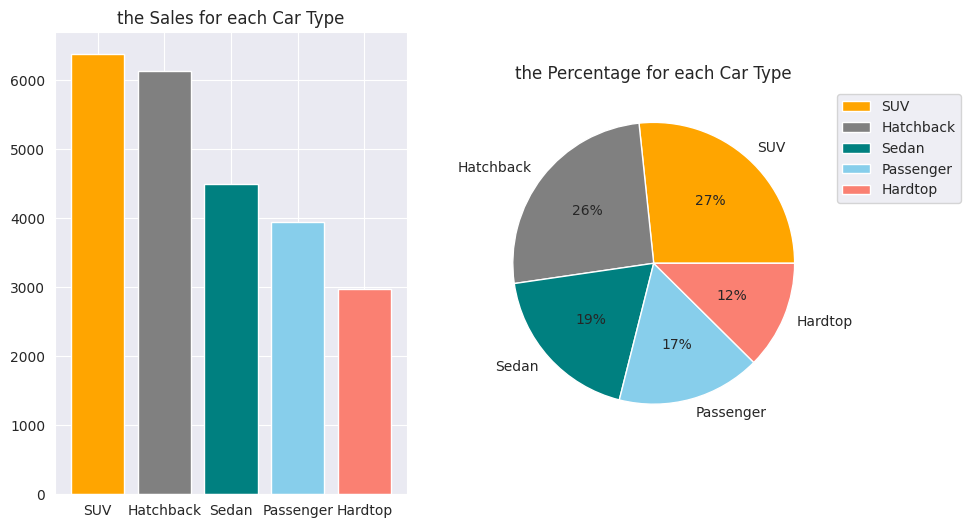

In [251]:
tmp = df['Body Style'].value_counts()
colors = ['orange','gray','teal','skyblue','salmon']
fig,ax= plt.subplots(1,2,figsize=(10,6))
ax[0].bar(tmp.index,tmp,color=colors)
ax[0].set_title("the Sales for each Car Type")
ax[1].pie(tmp,labels=tmp.index,autopct='%.0f%%',colors=colors)
ax[1].set_title("the Percentage for each Car Type")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

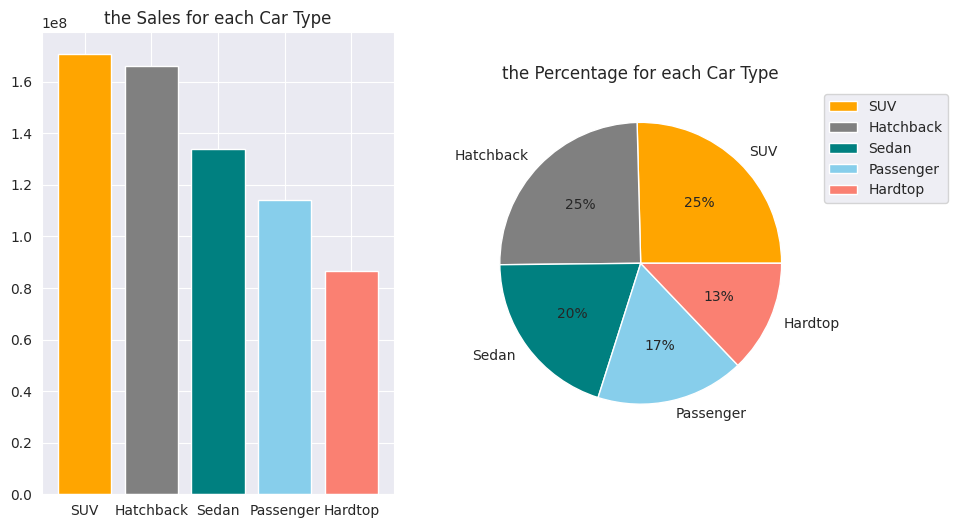

In [252]:
tmp = df[['Body Style','Price ($)']].groupby(['Body Style']).sum()
tmp = tmp.sort_values(by='Price ($)',ascending=False)
tmp.reset_index(inplace=True)

fig,ax= plt.subplots(1,2,figsize=(10,6))
ax[0].bar(tmp['Body Style'],tmp['Price ($)'],color=colors)
ax[0].set_title("the Sales for each Car Type")
ax[1].pie(tmp['Price ($)'],labels=tmp['Body Style'],autopct='%.0f%%',colors=colors)
ax[1].set_title("the Percentage for each Car Type")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

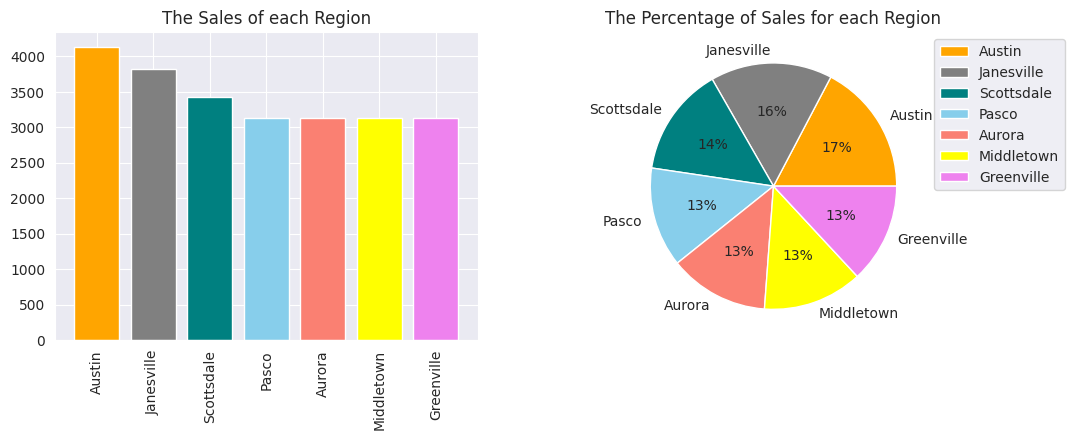

In [253]:
tmp = df['Dealer_Region'].value_counts()
colors = ['orange','gray','teal','skyblue','salmon','yellow','violet']

fig,ax= plt.subplots(1,2,figsize=(12,4))
ax[0].bar(tmp.index,tmp,color=colors)
ax[0].set_title("The Sales of each Region")
ax[0].set_xticks(tmp.index,tmp.index,rotation=90)
ax[1].pie(tmp,labels=tmp.index,autopct='%.0f%%',colors=colors)
ax[1].set_title("The Percentage of Sales for each Region")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

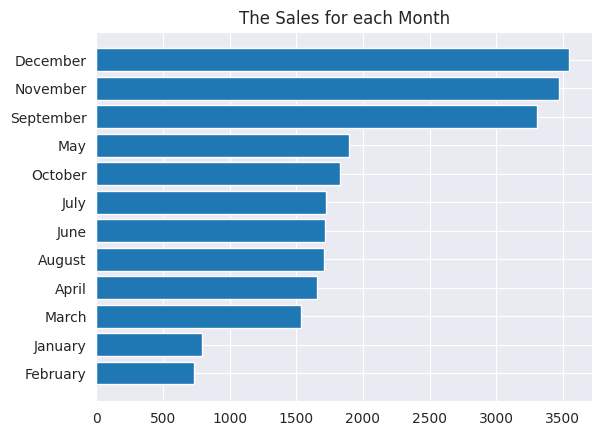

In [254]:
# what month have the most number of sales
tmp = df['Date'].dt.month_name().value_counts().sort_values()
tmp
fig,ax = plt.subplots()
ax.barh(tmp.index,tmp)
ax.set_title('The Sales for each Month')
plt.show()


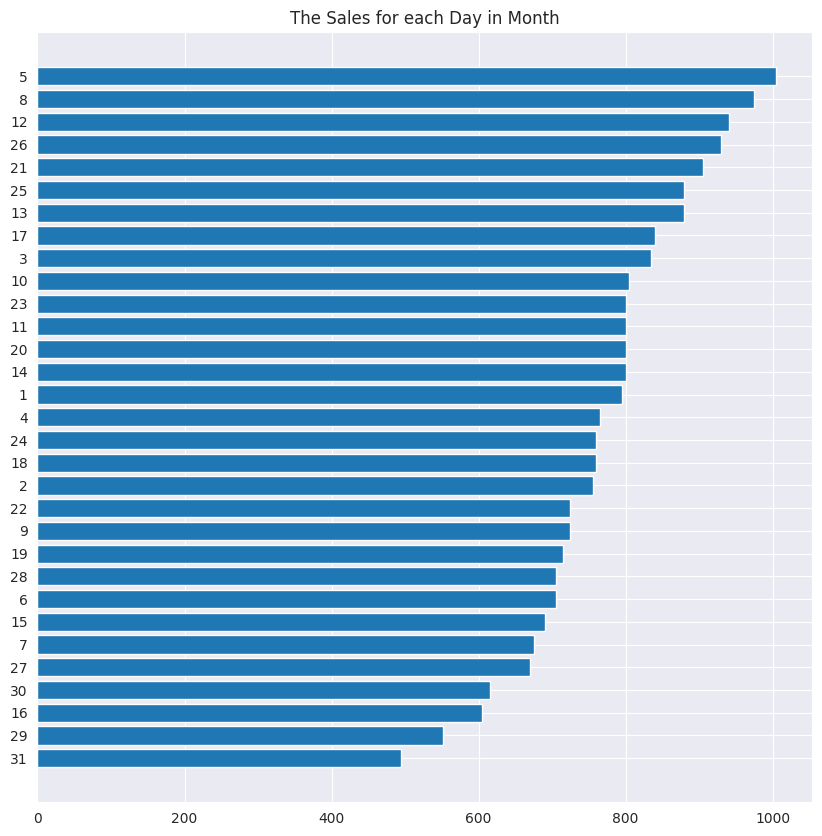

In [255]:
# what day of month have the most number of sales
tmp = df['day'].value_counts().sort_values()
tmp = tmp.reset_index()
tmp['day'] = tmp['day'].astype('string')
tmp
fig,ax = plt.subplots(figsize=(10,10))
ax.barh(tmp['day'],tmp['count'])
ax.set_title('The Sales for each Day in Month')
plt.show()

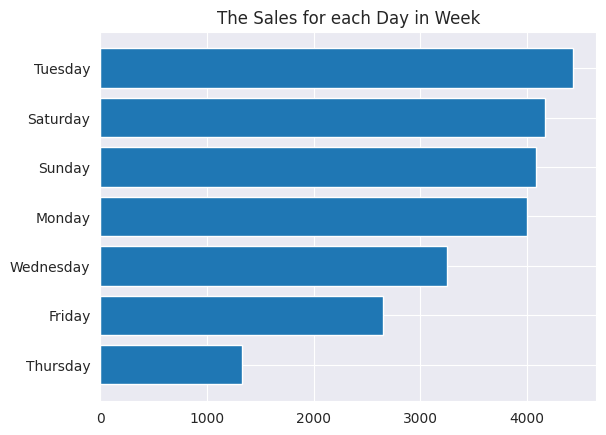

In [256]:
# what month have the most number of sales
tmp = df['Date'].dt.day_name().value_counts().sort_values()
tmp
fig,ax = plt.subplots()
ax.barh(tmp.index,tmp)
ax.set_title('The Sales for each Day in Week')
plt.show()

In [257]:
# draft
print(df.shape)
df.sample(3,random_state=20)

(23905, 16)


,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Body Style,Dealer_Region,month,WeekDay,day
15013,2023-06-20,Enzo,Female,13500,Ryder Truck Rental and Leasing,Chrysler,Sebring Coupe,DoubleÂ Overhead Camshaft,Auto,Pale White,19001,Sedan,Middletown,June,Tuesday,20
19819,2023-10-21,Bryce,Male,395000,Suburban Ford,Volkswagen,Passat,Overhead Camshaft,Manual,Pale White,27001,Hatchback,Janesville,October,Saturday,21
22430,2023-12-06,Celia,Male,13500,Hatfield Volkswagen,Toyota,Camry,DoubleÂ Overhead Camshaft,Auto,Red,31001,Hatchback,Pasco,December,Wednesday,6


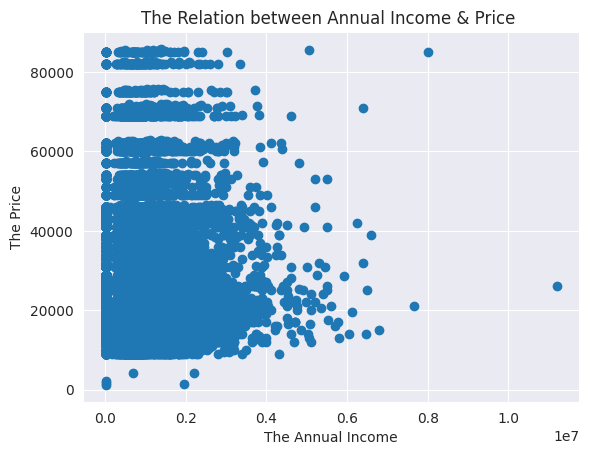

In [258]:
fig,ax = plt.subplots()
ax.scatter(df['Annual Income'],df['Price ($)'])
ax.set(title='The Relation between Annual Income & Price ',
       xlabel='The Annual Income',ylabel='The Price')
plt.show()

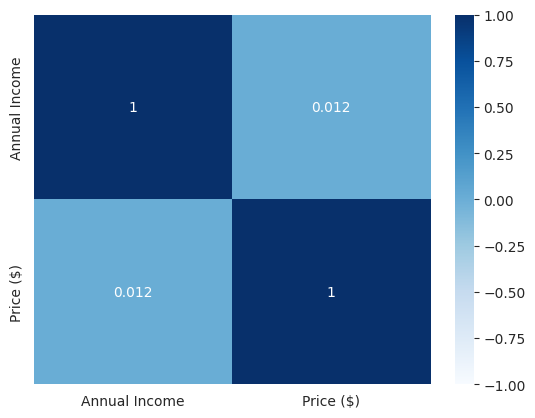

In [259]:
corr = df[['Annual Income','Price ($)']].corr()
sns.heatmap(corr,annot=True,cmap='Blues',vmax=1,vmin=-1)
plt.show()

In [260]:
df.drop(columns=['Date','Customer Name'],inplace=True)

### feature transformation


In [261]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True)

tmp = pt.fit_transform(df[['Annual Income']])
tmp = pd.DataFrame(tmp,columns=['Annual Income'])
df['Annual Income'] = tmp
df.head()

,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Body Style,Dealer_Region,month,WeekDay,day
0,Male,-1.606757,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,SUV,Middletown,January,Sunday,2
1,Male,0.940383,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,SUV,Aurora,January,Sunday,2
2,Male,0.516842,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,Passenger,Greenville,January,Sunday,2
3,Male,-1.606757,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,SUV,Pasco,January,Sunday,2
4,Male,0.927378,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,Hatchback,Janesville,January,Sunday,2


## transformation (encoding)

In [262]:
# 10 cols to encode
# gender, company, model, color, body, style, dealer, region -> binary
# engine ,transmission -> label

In [263]:
from category_encoders import BinaryEncoder
cols = ['Gender','Dealer_Name', 'Company', 'Model', 'Color', 'Body Style','Dealer_Region','month','WeekDay','day']

bin_encoder= BinaryEncoder()
tmp = bin_encoder.fit_transform(df[cols])
tmp.head()

,Gender_0,Gender_1,Dealer_Name_0,Dealer_Name_1,Dealer_Name_2,Dealer_Name_3,Dealer_Name_4,Company_0,Company_1,Company_2,...,month_2,month_3,WeekDay_0,WeekDay_1,WeekDay_2,day_0,day_1,day_2,day_3,day_4
0,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
1,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
2,0,1,0,0,0,1,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
3,0,1,0,0,1,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,1
4,0,1,0,0,1,0,1,0,0,1,...,0,1,0,0,1,0,0,0,0,1


In [264]:
df.drop( columns=cols,inplace=True)
df = pd.concat([df,tmp],axis=1)

In [265]:
engine_map = {
            'Overhead Camshaft':1,
            'DoubleÂ\xa0Overhead Camshaft': 2
            }
df['Engine'] = df['Engine'].map(engine_map)
df['Engine'].head()

0    2
1    2
2    1
3    1
4    2
Name: Engine, dtype: int64

In [266]:
trans_map = {
    'Manual' : 1 ,
    'Auto':2
}
df['Transmission'] = df['Transmission'].map(trans_map)
df['Transmission'].head()

0    2
1    2
2    1
3    1
4    2
Name: Transmission, dtype: int64

In [267]:
df.sample(3)

,Annual Income,Engine,Transmission,Price ($),Gender_0,Gender_1,Dealer_Name_0,Dealer_Name_1,Dealer_Name_2,Dealer_Name_3,...,month_2,month_3,WeekDay_0,WeekDay_1,WeekDay_2,day_0,day_1,day_2,day_3,day_4
679,-1.606757,2,2,31000,0,1,0,0,1,0,...,1,1,1,0,0,0,0,0,0,1
2834,0.446890,1,1,34000,1,0,0,1,0,1,...,0,1,0,1,1,1,0,0,1,1
1365,0.424839,2,2,75000,1,0,0,1,1,1,...,0,0,1,1,1,0,0,0,0,1


In [268]:
df.dropna(inplace=True)

## train_test split

In [269]:
# overview
print(df.shape)
df.head(3)

(23904, 44)


,Annual Income,Engine,Transmission,Price ($),Gender_0,Gender_1,Dealer_Name_0,Dealer_Name_1,Dealer_Name_2,Dealer_Name_3,...,month_2,month_3,WeekDay_0,WeekDay_1,WeekDay_2,day_0,day_1,day_2,day_3,day_4
0,-1.606757,2,2,26000,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
1,0.940383,2,2,19000,0,1,0,0,0,1,...,0,1,0,0,1,0,0,0,0,1
2,0.516842,1,1,31500,0,1,0,0,0,1,...,0,1,0,0,1,0,0,0,0,1


In [270]:
x = df.drop('Price ($)', axis=1)  
y = df['Price ($)'] 

In [271]:
print(x.shape)
print(y.shape)

(23904, 43)
(23904,)


In [272]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)

In [273]:
print( x_train.shape)
x_train.sample(3)


(19123, 43)


,Annual Income,Engine,Transmission,Gender_0,Gender_1,Dealer_Name_0,Dealer_Name_1,Dealer_Name_2,Dealer_Name_3,Dealer_Name_4,...,month_2,month_3,WeekDay_0,WeekDay_1,WeekDay_2,day_0,day_1,day_2,day_3,day_4
1475,0.957608,2,2,1,0,0,1,0,0,1,...,0,0,0,1,1,0,0,1,0,0
8798,-1.606757,1,1,0,1,0,0,0,1,0,...,1,1,0,0,1,1,0,0,0,0
125,1.881499,2,2,0,1,1,0,1,0,0,...,0,1,0,0,1,0,0,1,1,0


In [274]:
print( x_test.shape)
x_test.sample(3)


(4781, 43)


,Annual Income,Engine,Transmission,Gender_0,Gender_1,Dealer_Name_0,Dealer_Name_1,Dealer_Name_2,Dealer_Name_3,Dealer_Name_4,...,month_2,month_3,WeekDay_0,WeekDay_1,WeekDay_2,day_0,day_1,day_2,day_3,day_4
19822,-0.188695,2,2,0,1,0,0,1,0,1,...,1,0,1,1,1,0,1,1,0,0
2258,0.256526,1,1,0,1,0,1,1,1,0,...,0,1,1,0,0,0,0,0,1,1
8477,0.435896,1,1,0,1,0,0,1,0,0,...,1,1,0,1,0,0,1,1,0,0


In [275]:
print( y_train.shape)
y_train.sample(3)

(19123,)


21794    20000
720      19000
17435    31001
Name: Price ($), dtype: int64

In [276]:
print( y_test.shape)
y_test.sample(3)


(4781,)


1151     16000
18241    25000
15210    27000
Name: Price ($), dtype: int64

## scailing (standardization,normalization)

In [277]:
from sklearn.preprocessing import RobustScaler
r_scaler = RobustScaler()
x_train['Annual Income'] = r_scaler.fit_transform(x_train[['Annual Income']] )
x_train.sample(3)

,Annual Income,Engine,Transmission,Gender_0,Gender_1,Dealer_Name_0,Dealer_Name_1,Dealer_Name_2,Dealer_Name_3,Dealer_Name_4,...,month_2,month_3,WeekDay_0,WeekDay_1,WeekDay_2,day_0,day_1,day_2,day_3,day_4
14564,-0.483436,1,1,0,1,0,1,0,0,1,...,1,0,0,1,1,0,0,1,0,1
15057,-1.753675,1,1,0,1,0,1,0,0,0,...,1,0,0,1,1,1,1,0,1,0
22832,0.055568,2,2,0,1,0,1,0,0,0,...,0,0,0,1,0,1,1,1,1,1


In [278]:
x_test['Annual Income'] = r_scaler.transform(x_test[['Annual Income']] )
x_test.sample(3)

,Annual Income,Engine,Transmission,Gender_0,Gender_1,Dealer_Name_0,Dealer_Name_1,Dealer_Name_2,Dealer_Name_3,Dealer_Name_4,...,month_2,month_3,WeekDay_0,WeekDay_1,WeekDay_2,day_0,day_1,day_2,day_3,day_4
5143,-0.258544,1,1,0,1,0,1,0,0,0,...,0,1,1,1,1,0,0,0,1,0
12578,0.639123,1,1,1,0,1,1,0,0,0,...,0,0,1,1,1,1,0,1,0,1
19452,-0.103687,1,1,1,0,0,1,1,1,0,...,1,0,1,1,0,0,1,0,0,1


## modeling

In [279]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [280]:
def evaluate_model(y_test, y_pred, model_name):
    print(f"Model: {model_name}")
    print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred)}")
    print(f"R² Score: {r2_score(y_test, y_pred)}")
    print("-" * 30)

In [281]:
x_train.dropna(inplace=True)

### LinearRegression

In [282]:
model =LinearRegression()
model.fit(x_train,y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

evaluate_model(y_train,y_train_pred,'LinearRegression training')
evaluate_model(y_test,y_test_pred,'LinearRegression predicting')

Model: LinearRegression training
Mean Squared Error (MSE): 215071357.2580139
R² Score: 0.019970224823131377
------------------------------
Model: LinearRegression predicting
Mean Squared Error (MSE): 211514208.4032629
R² Score: 0.019281802747275867
------------------------------


### DecisionTreeRegressor

In [283]:
model =DecisionTreeRegressor()
model.fit(x_train,y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

evaluate_model(y_train,y_train_pred,'DecisionTreeRegressor training')
evaluate_model(y_test,y_test_pred,'DecisionTreeRegressor predicting')

Model: DecisionTreeRegressor training
Mean Squared Error (MSE): 0.0
R² Score: 1.0
------------------------------
Model: DecisionTreeRegressor predicting
Mean Squared Error (MSE): 131692943.35641079
R² Score: 0.38938538940530143
------------------------------


### RandomForestRegressor

In [290]:
rf_model = RandomForestRegressor(n_estimators=450,max_depth=20,random_state=20)

rf_model.fit(x_train,y_train)
y_train_pred = rf_model.predict(x_train)
y_test_pred = rf_model.predict(x_test)

evaluate_model(y_train,y_train_pred,'RandomForestRegressor training')
evaluate_model(y_test,y_test_pred,'RandomForestRegressor predicting')
y_final_pred = y_test_pred

Model: RandomForestRegressor training
Mean Squared Error (MSE): 9915978.279152006
R² Score: 0.9548152106934549
------------------------------
Model: RandomForestRegressor predicting
Mean Squared Error (MSE): 64426126.92013921
R² Score: 0.7012783418850483
------------------------------


### Support vector machine regression

In [285]:
model = SVR()
model.fit(x_train,y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

evaluate_model(y_train,y_train_pred,'SVR training')
evaluate_model(y_test,y_test_pred,'SVR predicting')

Model: SVR training
Mean Squared Error (MSE): 245887514.58223996
R² Score: -0.12045178264132805
------------------------------
Model: SVR predicting
Mean Squared Error (MSE): 240369167.29175463
R² Score: -0.11450865736673377
------------------------------


### GradientBoostingRegressor

In [286]:
model =GradientBoostingRegressor()
model.fit(x_train,y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

evaluate_model(y_train,y_train_pred,'GradientBoostingRegressor training')
evaluate_model(y_test,y_test_pred,'GradientBoostingRegressor predicting')

Model: GradientBoostingRegressor training
Mean Squared Error (MSE): 178383276.86269403
R² Score: 0.18714920969540205
------------------------------
Model: GradientBoostingRegressor predicting
Mean Squared Error (MSE): 177762415.38378522
R² Score: 0.17577718834804112
------------------------------


### XGBRegressor

In [287]:
model =XGBRegressor()
model.fit(x_train,y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

evaluate_model(y_train,y_train_pred,'xgboost training')
evaluate_model(y_test,y_test_pred,'xgboost predicting')


Model: xgboost training
Mean Squared Error (MSE): 46764500.62796104
R² Score: 0.786905129437121
------------------------------
Model: xgboost predicting
Mean Squared Error (MSE): 78905006.99771266
R² Score: 0.6341447848766997
------------------------------


### optimization

In [288]:
from sklearn.model_selection import GridSearchCV

rf_regressor = RandomForestRegressor(random_state=20)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [ 200,300,450],
    'max_depth': [None, 10, 20, 30]
}

grid_search_reg = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=4, scoring='neg_mean_squared_error', verbose=1)

grid_search_reg.fit(x_train,y_train)

print("Best Hyperparameters:", grid_search_reg.best_params_)

y_pred = grid_search_reg.best_estimator_.predict(x_test)

# Evaluate the model
print('Mean Squared Error: ',mean_squared_error(y_test, y_pred)) 

print('the R2 score is ',r2_score(y_test, y_pred))

Fitting 4 folds for each of 12 candidates, totalling 48 fits
Best Hyperparameters: {'max_depth': 20, 'n_estimators': 450}
Mean Squared Error:  64426126.92013921
the R2 score is  0.7012783418850483


## visualization

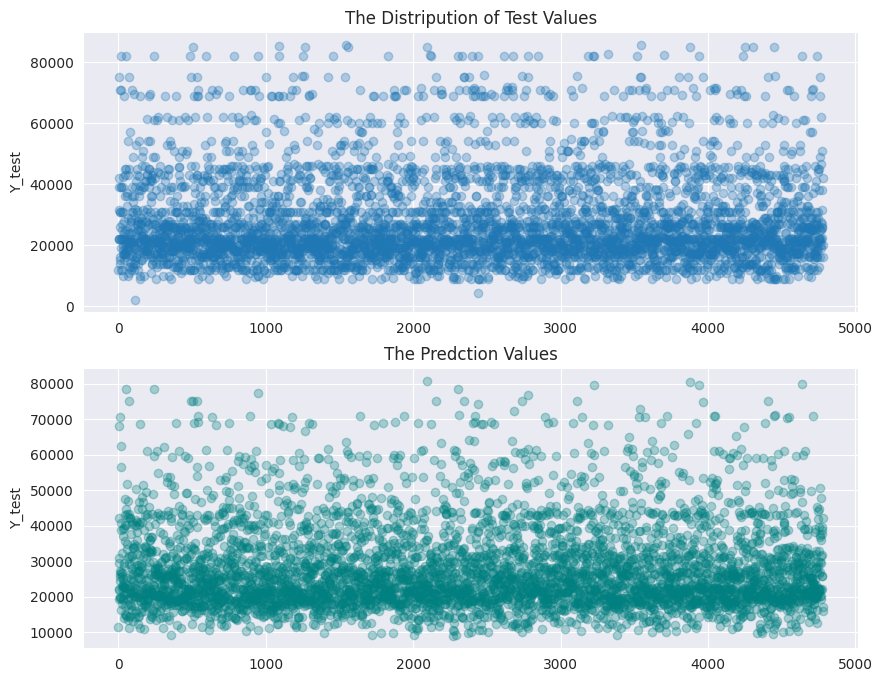

In [291]:
xaxis = np.arange(0,len(y_test))
fig,ax = plt.subplots(2,1,figsize=(10,8))
ax[0].scatter(xaxis,y_test,alpha=0.3)
ax[0].set(title='The Distripution of Test Values',
          ylabel='Y_test')
ax[1].scatter(xaxis,y_final_pred,alpha=0.3,color=['teal'])
ax[1].set(title='The Predction Values',
          ylabel='Y_test')
plt.show()


### save the model

In [58]:
# with open('rf_model.pkl', 'wb') as file:
#     pickle.dump(rf_model, file)

# with open('encoder.pkl', 'wb') as file:
#     pickle.dump(bin_encoder, file)

# with open('scaler.pkl', 'wb') as file:
#     pickle.dump(r_scaler, file)